# Pushing the boundaries with Ensemble Models

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn import linear_model,cross_validation

Random forest is a non parametric modeling technique where multiple decision trees are created during the training time and then the result of these decision trees are averaged to give the required output.

An analogy would be to guess the number pebbles in a glass jar. There are group of people who are trying to guess the number of people pebbles in the jar. Individually each person  would be very wrong in guessing the number of pebbles in the glass jar but when you average each of their guesses, the resulting averaged guess would be pretty close to the actual number of pebbles in the glass jar.


## Census Income Dataset

The following dataset by University of California, Irvine on the census data of the income

<table>
<tr>
    <th>Columns</th>
    <th>Descriptions</th>
</tr>
<tr>
    <td>age</td>
    <td> Age of the Person</td>
</tr>
<tr>
    <td>workclass</td>
    <td>The type of employment of the person</td>
</tr>
<tr>
    <td>education</td>
    <td>Education level of the person</td>
</tr>
<tr>
    <td>marital_status</td>
    <td>If the person if married or not</td>
</tr>
<tr>
    <td>Occupation</td>
    <td>What type of jobs does the person do</td>
</tr>
<tr>
    <td>relationship</td>
    <td>Type of relationship of the person</td>
</tr>
<tr>
    <td>race</td>
    <td>Ethinicity of the person</td>
</tr>
<tr>
    <td>gender</td>
    <td>Gender of the person </td>
</tr>
<tr>
    <td>hours_per_week</td>
    <td>Average hours worked per week</td>
</tr>
<tr>
    <td>native_country</td>
    <td>Country of origin</td>
</tr>
<tr>
    <td>greater_than_50k</td>
    <td>Flag which indicates if the person is earning more than 50K dollars in a year</td>
</tr>
</table>

Let's load the data

In [3]:
pwd()

'/home/s6413/MasteringDataScience'

In [4]:
data = pd.read_csv('/home/s6413/MasteringDataScience/census.csv')
data

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


Let's check the fill rate of the data

In [5]:
data.count(0)/data.shape[0] * 100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

We can see that the the columns have got a good fill rate. We'll remove the rows the which have empty values

In [6]:
data = data.dropna(how='any')
del data['education_num']

## Exploring the Census Data

Let's explore the data and understand the patterns with the data before building the model

<strong>Hypothesis 1: People who are older, earn more.</strong>

We'll create a histogram of the people who are earning less than 50K and a histogram who are earning more than 50K

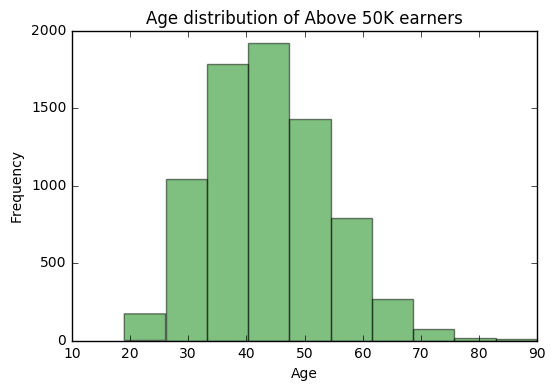

In [7]:
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of Above 50K earners')
plt.xlabel('Age')
plt.ylabel('Frequency')

And the histogram who are earning less than 50K

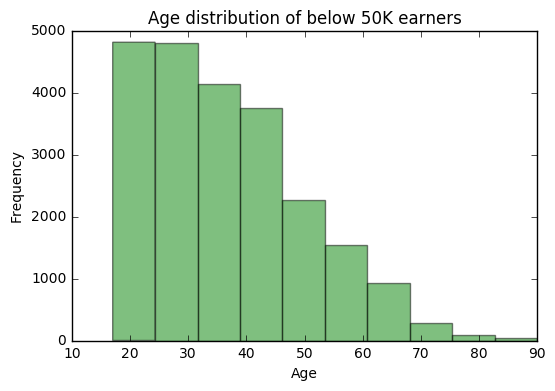

In [8]:
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of below 50K earners')
plt.xlabel('Age')
plt.ylabel('Frequency')

We can see that people who are earning above 50K are majorly concentrated post 30 years of age till mid 50s where as people who are earning less than 50K dollars are primarily concentrated at the 20s and 30s

<strong>Hypothesis 2: Earning Bias based on working class </strong>

Let's see how is the distribution of the people earning more thatn 50K between different working class group. We'll see the percentage of more than 50K earners in each of the groups using the following code

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


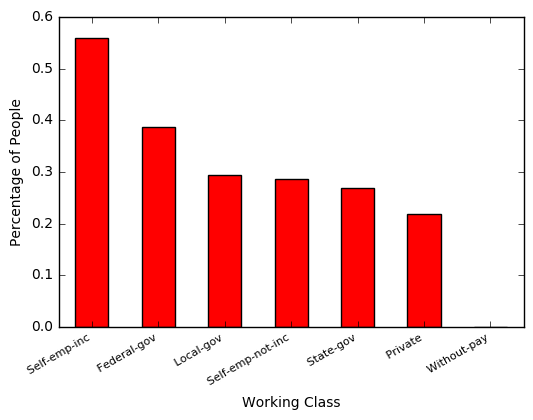

In [9]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count()
                          , data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

dist_data.columns = ['wk_class_gt50','wk_class_lt50']

dist_data_final = dist_data.wk_class_gt50 / (dist_data.wk_class_lt50 + dist_data.wk_class_gt50 )

dist_data_final.sort(ascending=False)
ax = dist_data_final.plot(kind = 'bar', color = 'r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Working Class')
ax.set_ylabel('Percentage of People')

We see that people who are self employed and have a company have got the maximum share of people who are earning more than 50K. The 2nd most well off group are the federal government employees in terms of earning.

<strong>Hypothesis 3: People with more education, earn more</strong>

Education is an important field. It should have a relation to the level to the earning power of an individual

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


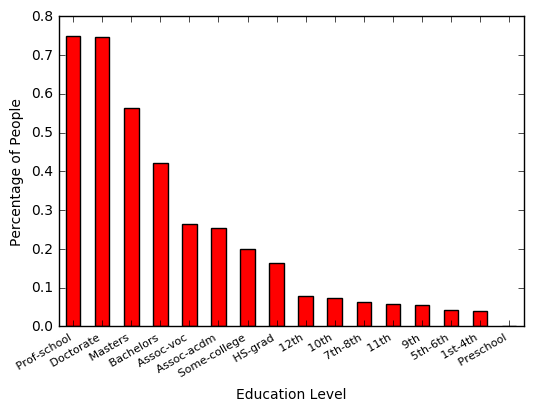

In [10]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count()
                          , data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns = ['education_gt50','education_lt50']

dist_data_final = dist_data.education_gt50 / (dist_data.education_gt50 + dist_data.education_lt50 )

dist_data_final.sort(ascending = False)
ax =dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of People')

We can see that the more the person is educated, there are greater number of people in their group who have more than 50K earnings

<strong>Hypothesis 4: Married People tend to earn more</strong>

Let's see how is the distribution based on marital status

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


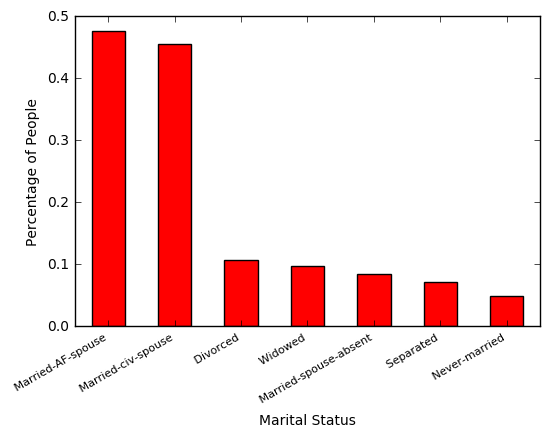

In [11]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count()
                          , data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)

dist_data.columns = ['marital_status_gt50','marital_status_lt50']

dist_data_final = dist_data.marital_status_gt50 / (dist_data.marital_status_gt50 + dist_data.marital_status_lt50 )

dist_data_final.sort(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage of People')

The above graph is interesting as it shows that the people who currently married have higher proportion of earning potential compared to the other groups

<strong>Hypothesis 5: There is bias in earning based on occupation </strong>

Occupation also plays a critical role and the following graph will be interesting

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


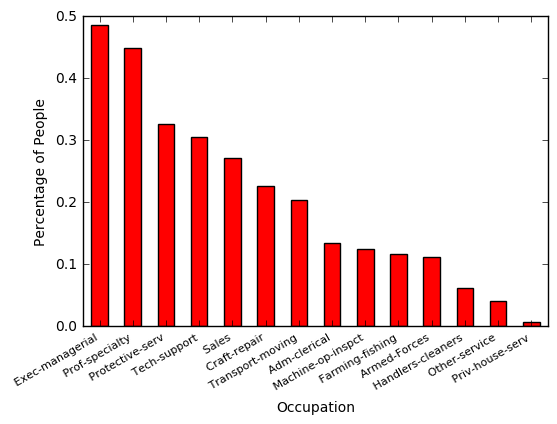

In [12]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('occupation').occupation.count()
                          , data[data.greater_than_50k == 0].groupby('occupation').occupation.count()], axis=1)

dist_data.columns = ['occupation_gt50','occupation_lt50']

dist_data_final = dist_data.occupation_gt50 / (dist_data.occupation_gt50 + dist_data.occupation_lt50 )

dist_data_final.sort(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage of People')

We can see that Executive Managers and people is speciality positions have a good earning power. Its also interesting to see that the armed forces have quite a low purchasing power

<strong> Hypothesis 6:  There is bias in earning based on race </strong>

Let's see how is the earning power based on the race of the person

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


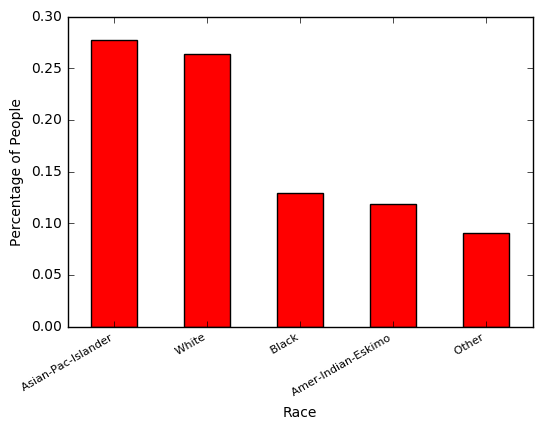

In [13]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('race').race.count()
                          , data[data.greater_than_50k == 0].groupby('race').race.count()], axis=1)

dist_data.columns = ['race_gt50','race_lt50']

dist_data_final = dist_data.race_gt50 / (dist_data.race_gt50 + dist_data.race_lt50 )

dist_data_final.sort(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Race')
ax.set_ylabel('Percentage of People')

The Asian Pacific people and the Whites have the highest earning power 

<strong>Hypothesis 7: Men earn more</strong>

Let's see how is the earning power based on the gender

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


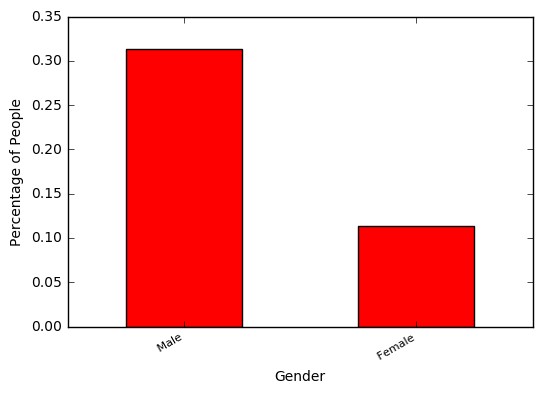

In [14]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('gender').gender.count()
                          , data[data.greater_than_50k == 0].groupby('gender').gender.count()], axis=1)

dist_data.columns = ['gender_gt50','gender_lt50']

dist_data_final = dist_data.gender_gt50 / (dist_data.gender_gt50 + dist_data.gender_lt50 )

dist_data_final.sort(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of People')

It's no surprise to see Males having a higher purchasing power compared to Females. It will be good to see the two bars at an equal level sometime in the future.

<strong> Hypothesis 8: People who clock in more hours, earn more</strong>

Let's see the distribution of the above 50K earners 

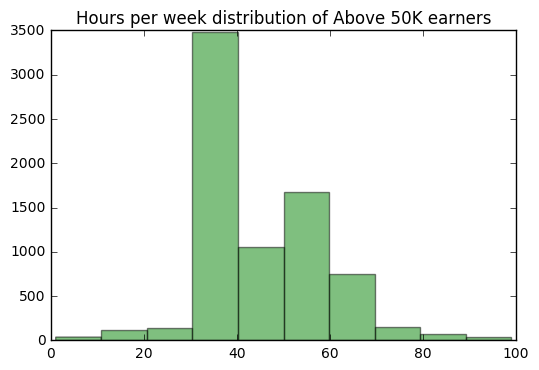

In [15]:
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].hours_per_week.values, 10, facecolor='green', alpha=0.5)
plt.title('Hours per week distribution of Above 50K earners')

Now, let's see the distribution of the below 50K earners

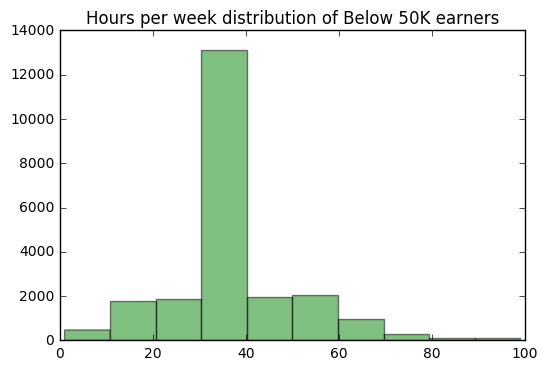

In [16]:
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].hours_per_week.values, 10, facecolor='green', alpha=0.5)
plt.title('Hours per week distribution of Below 50K earners')

We can see that people who are earning more than 50K and less than that have an average working hours of 40 hours per week but it can be seen that people who above 50K have more proportion of people working post 40 hours

<strong>Hypothesis 9: There is a bias in earning based on the country of origin</strong>

Let's see how is the earning power based on the native country

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


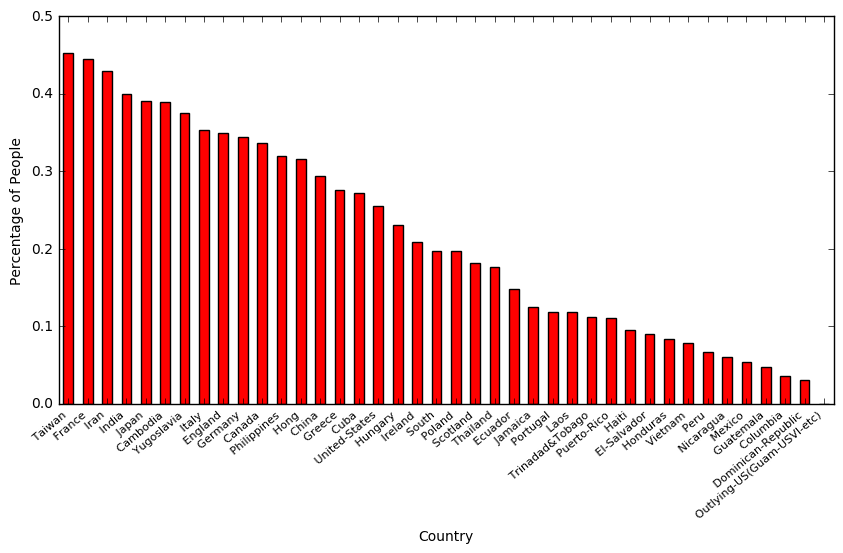

In [17]:
plt.figure(figsize=(10,5))
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('native_country').native_country.count()
                          , data[data.greater_than_50k == 0].groupby('native_country').native_country.count()], axis=1)

dist_data.columns = ['native_country_gt50','native_country_lt50']

dist_data_final = dist_data.native_country_gt50 / (dist_data.native_country_gt50 + dist_data.native_country_lt50 )

dist_data_final.sort(ascending = False)

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=40, fontsize=8, ha='right')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of People')

We can see that people of Taiwan, the french, iranians and indians are the most well earning people among the country of origin

## Decision Trees

To understand Decision Tree based models, let's try to imagine that Google wants to recruit people for a software development job. Based on the employees that they already have and the ones they rejected previously, we have whether an applicant was from Ivy college or not and what was the GPA of the applicant. 

The decision tree will split the applicant into Ivy League and Non Ivy League groups. The Ivy League group will then be split into high GPA and low GPA so the people with high GPA will be tagged High likely and the ones with low GPA will be tagged Likely to get recruited. 

The applicants who are Non Ivy League and High GPA will have somewhat likely and the remaining ones as less likely. 

This above explanation is in a simple terms what a decision tree would do.

Let's create a decision tree on our data to predict whats the likelihood if a person is going to earn more than 50K dollars.


In [24]:
data_test = pd.read_csv('/home/s6413/MasteringDataScience/census_test.csv')
data_test = data_test.dropna(how='any')
formula = 'greater_than_50k ~  age + workclass + education + marital_status + occupation + race + gender + hours_per_week + native_country ' 

y_train,x_train = dmatrices(formula, data=data, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=data_test, return_type='dataframe')

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

Let's see how the model is performing

In [25]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)

print(pd.crosstab(y_test.greater_than_50k,y_pred,rownames = ['Actual'],colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test.greater_than_50k,y_pred))

Predicted   0.0   1.0
Actual               
0.0        9826  1534
1.0        1775  1925

 

             precision    recall  f1-score   support

        0.0       0.85      0.86      0.86     11360
        1.0       0.56      0.52      0.54      3700

avg / total       0.78      0.78      0.78     15060



We can see that the people who are not earning above 50K dollars can be predicted well as there is a precision of 85% and recall of 87%. The people who are earning above 50K can be predicted only with precision of 56% and recall of 52%

## Random Forest

We just learned how to create a decision tree but many at times decision tree models don't hold good when there are many variables and a large dataset. This is where ensemble models like Random Forest comes to rescue. 

Random Forest is basically creating many decision trees on the dataset and then averaging out the results. If you see singing competitions like American Idol or Olympics there are multiple judges. The reason to have multiple judges to eliminate biasness and bring fair result and this is what Random Forest tries to achieve. 

Let's try to create Random Forest Model and see how is the performance compared to the Decision Tree that we just created

In [26]:
import sklearn.ensemble as sk

clf = sk.RandomForestClassifier(n_estimators=100)
clf = clf.fit(x_train, y_train.greater_than_50k)

Ater building the model, let's cross validate the model on the test data

In [28]:
y_pred = clf.predict(x_test)

print(pd.crosstab(y_test.greater_than_50k
                  ,y_pred
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test.greater_than_50k,y_pred))

Predicted    0.0   1.0
Actual                
0.0        10164  1196
1.0         1698  2002

 

             precision    recall  f1-score   support

        0.0       0.86      0.89      0.88     11360
        1.0       0.63      0.54      0.58      3700

avg / total       0.80      0.81      0.80     15060



We can see that that we have improved the precision and recall for the people who are not earning more 50K dollars and as well as the precision and recall has improved for the people who have earned more than 50K dollars.

Let's try to do some more fine tuning to get a better performance for the model by using the min_samples_split parameter and setting it to 5. This parameter says that the minimum number of samples required to create a split is 5

In [31]:
clf = sk.RandomForestClassifier(n_estimators=100, oob_score=True,min_samples_split=5)
clf = clf.fit(x_train, y_train.greater_than_50k)

y_pred = clf.predict(x_test)

print(pd.crosstab(y_test.greater_than_50k
                  ,y_pred
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test.greater_than_50k,y_pred))


Predicted    0.0   1.0
Actual                
0.0        10266  1094
1.0         1627  2073

 

             precision    recall  f1-score   support

        0.0       0.86      0.90      0.88     11360
        1.0       0.65      0.56      0.60      3700

avg / total       0.81      0.82      0.81     15060



We increased the recall of 0 to 90% and of 1 to 56%, also the precision of 1 to 65%. Let's further fine tune it.

In [33]:
clf = sk.RandomForestClassifier(n_estimators=100, oob_score=True,min_samples_split=5, min_samples_leaf= 2)
clf = clf.fit(x_train, y_train.greater_than_50k)

y_pred = clf.predict(x_test)

print(pd.crosstab(y_test.greater_than_50k
                  ,y_pred
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test.greater_than_50k,y_pred))


Predicted    0.0   1.0
Actual                
0.0        10465   895
1.0         1633  2067

 

             precision    recall  f1-score   support

        0.0       0.87      0.92      0.89     11360
        1.0       0.70      0.56      0.62      3700

avg / total       0.82      0.83      0.83     15060



We increase the minimum number of samples in a newly created leaf to 2 and we see our recall jump to 92% for 0 and precision of 1 hitting 70%. 

This is a decent model and we can freeze it.

Let's see the importance of the variables that is contributing to the prediction. We'll be using the feature_importances_ attribute of the clf object and using that we'll plot the important features

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':
/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


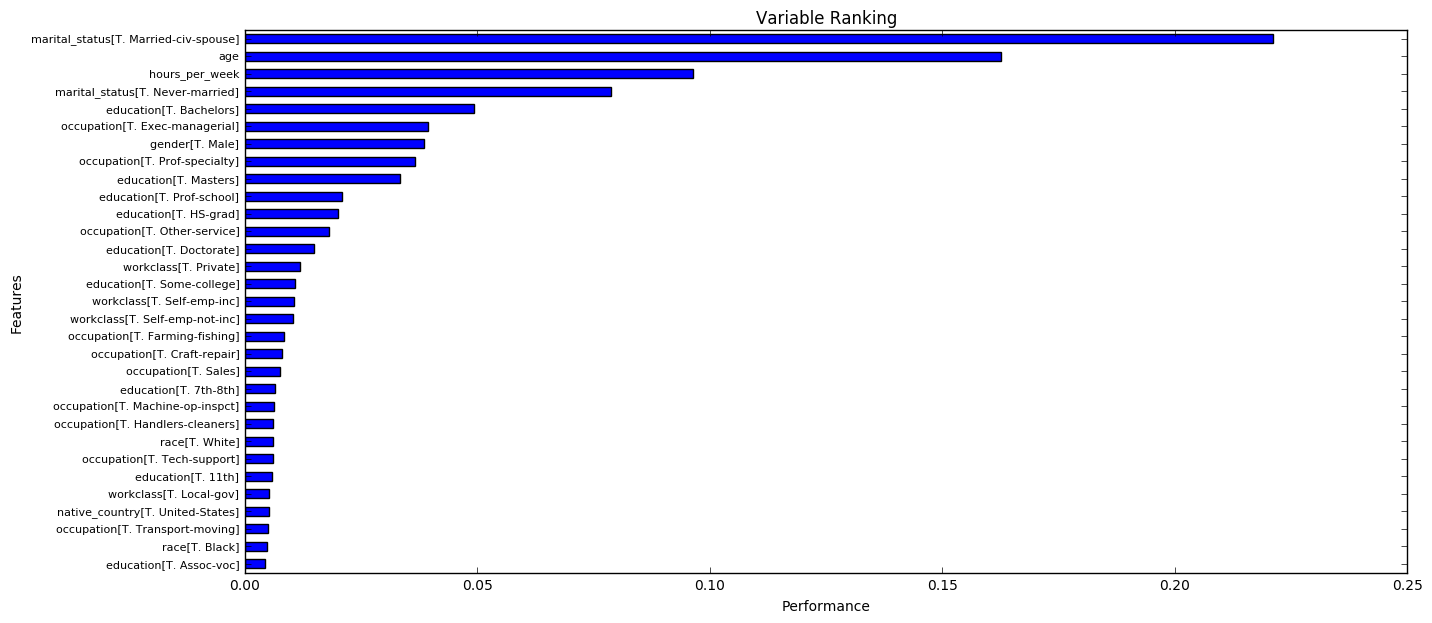

In [34]:
model_ranks = pd.Series(clf.feature_importances_, index=x_train.columns, name='Importance').sort(ascending=False, inplace=False)
model_ranks.index.name = 'Features'
top_features = model_ranks.iloc[:31].sort(ascending=True, inplace=False)
plt.figure(figsize=(15,7))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Ranking")
_ = ax.set_xlabel('Performance')
_ = ax.set_yticklabels(top_features.index, fontsize=8)


We can see that people who are married with a civilian spouse is a good very good indicator of earning more thatn 50K or not. This is followed by the age of the person then comes how many hours the person works. Also people who are never married is also a good indicator which would help in predicting more of people who are earning less than 50K.